<a href="https://colab.research.google.com/github/tshetty1974/Credit-scoring/blob/main/Credit_Scoring_with_Attention_mechanism_and_Ensemble_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.columns = df.columns.str.lower()
df = df.drop(['id', 'customer_id', 'month', 'name', 'ssn'], axis=1)
df.head(2)

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.94496,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  float64
 1   occupation                100000 non-null  object 
 2   annual_income             100000 non-null  float64
 3   monthly_inhand_salary     100000 non-null  float64
 4   num_bank_accounts         100000 non-null  float64
 5   num_credit_card           100000 non-null  float64
 6   interest_rate             100000 non-null  float64
 7   num_of_loan               100000 non-null  float64
 8   type_of_loan              100000 non-null  object 
 9   delay_from_due_date       100000 non-null  float64
 10  num_of_delayed_payment    100000 non-null  float64
 11  changed_credit_limit      100000 non-null  float64
 12  num_credit_inquiries      100000 non-null  float64
 13  credit_mix                100000 non-null  ob

In [ ]:
string_columns = df.dtypes[df.dtypes == object].index
df_str = df[string_columns].drop('credit_score', axis=1)
df_str.head()

,occupation,type_of_loan,credit_mix,payment_of_min_amount,payment_behaviour
0,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Small_value_payments
1,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Large_value_payments
2,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Medium_value_payments
3,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Small_value_payments
4,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Medium_value_payments


In [ ]:
numerical_columns = df.dtypes[df.dtypes != object].index
df_num = df[numerical_columns]
df_num.head()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231


In [ ]:
df_num.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


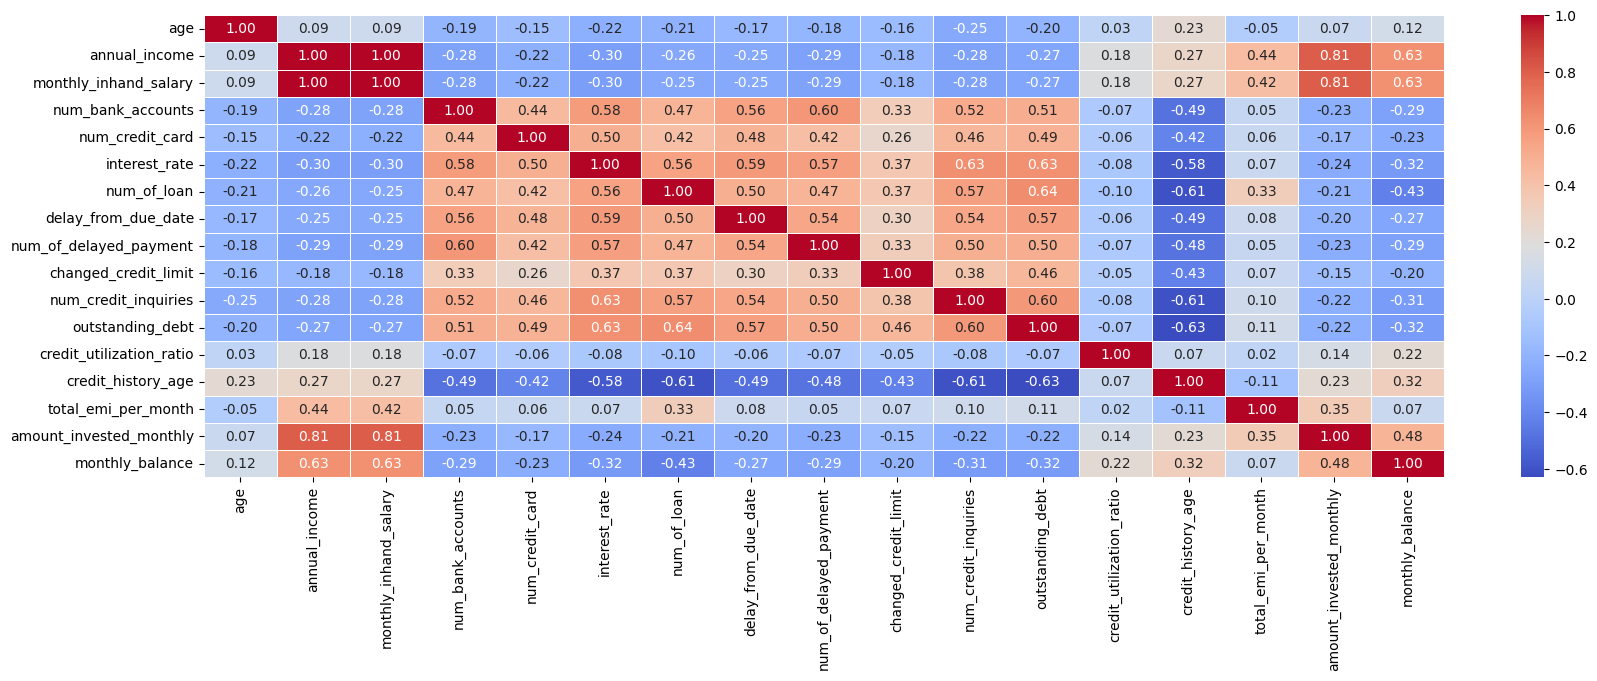

In [ ]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

In [ ]:
df_num = df_num.drop('annual_income', axis=1)

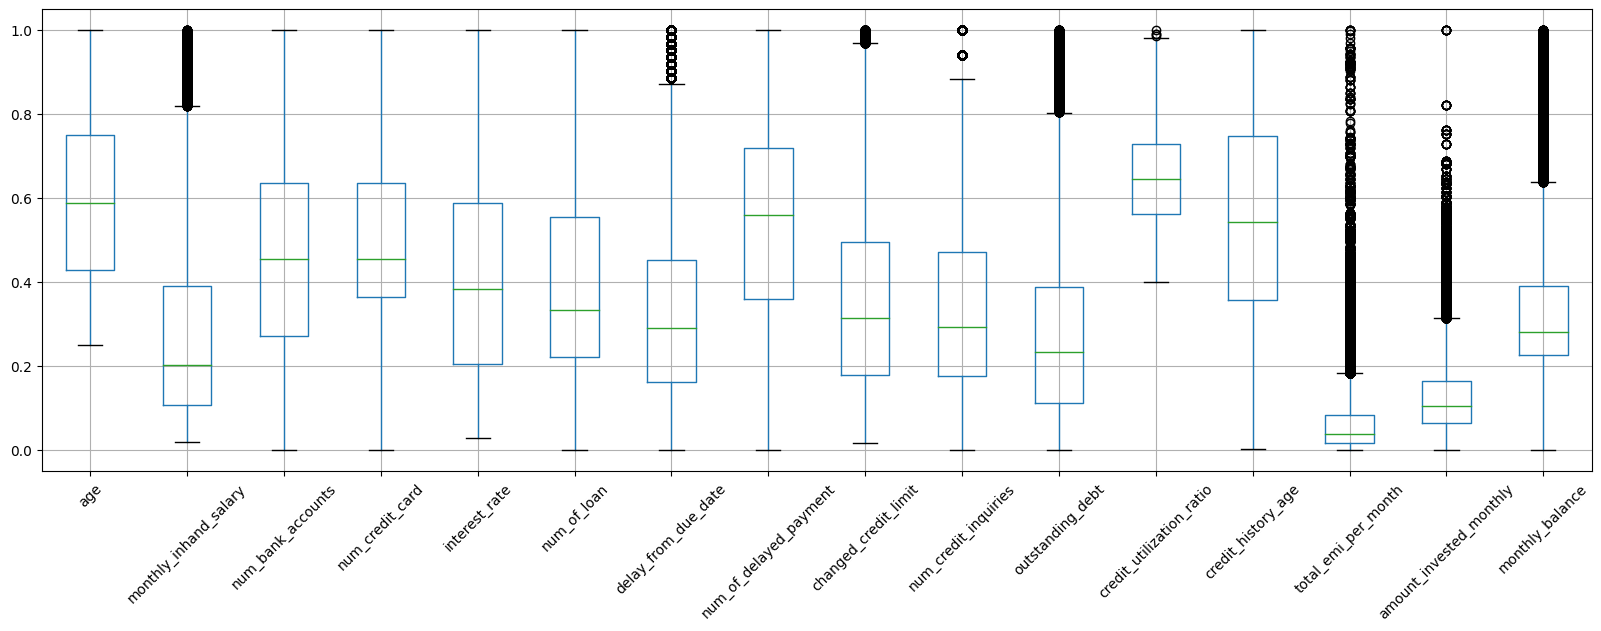

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
ax = (df_num/df_num.max()).boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
grouped = df.groupby('credit_score').mean(numeric_only=True)
grouped

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
credit_score,,,,,,,,,,,,,,,,,
Good,36.402625,65203.672105,5399.919696,3.440263,4.143258,7.662329,2.202154,10.958997,8.564842,7.249857,3.298631,801.256324,32.686107,284.765650,121.691019,67.417611,456.691556
Poor,31.194565,40584.515325,3380.560657,6.526726,6.625147,20.187116,4.755742,29.728809,15.809883,11.116281,8.179599,2081.473157,31.986146,170.061797,111.198326,47.033019,339.212601
Standard,33.438673,50987.164840,4239.436890,5.383966,5.404427,13.751420,3.312164,19.759431,13.543518,11.197803,5.337665,1278.419552,32.313820,227.814195,101.099865,55.371927,400.409496


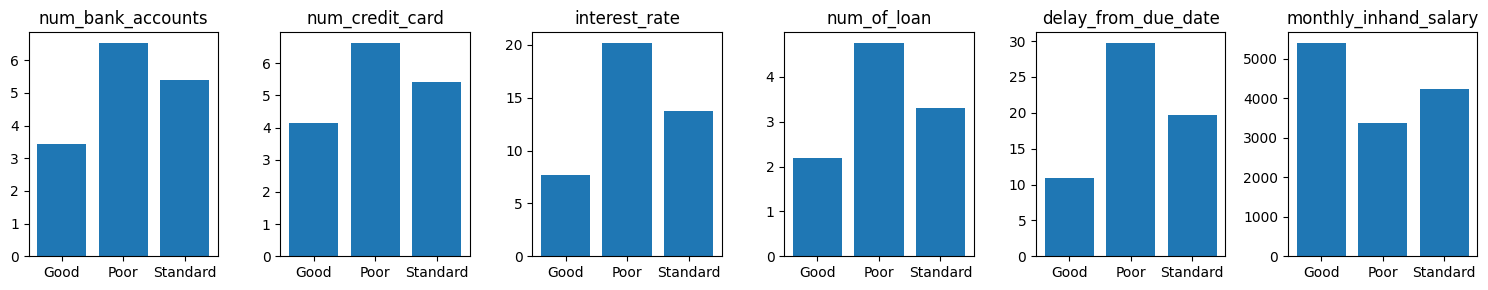

In [ ]:
columns_for_bar_plot = ['num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'monthly_inhand_salary']

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for i, column in enumerate(columns_for_bar_plot):
    ax = axes[i]
    ax.bar(grouped.index, grouped[column])
    ax.set_title(f'{column}')

plt.tight_layout()
plt.show()

In [ ]:
def process_type_of_loan(df):

    # Split the strings and create a set of unique items
    unique_items = set()

    for item_list in df['type_of_loan']:
        items = item_list.split(',')
        unique_items.update(items)

    # Create a dictionary to hold binary indicators for each item
    indicators = {}
    for item in unique_items:
        indicators[item] = df['type_of_loan'].apply(lambda x: item in x).astype(int)

    # Create a new DataFrame with binary indicators
    result_df = pd.DataFrame(indicators)

    return result_df

In [ ]:
df_str = pd.concat([df_str, process_type_of_loan(df)], axis=1).drop('type_of_loan', axis=1)
df_str.head()

,occupation,credit_mix,payment_of_min_amount,payment_behaviour,auto loan,home equity loan,mortgage loan,No Data,debt consolidation loan,credit-builder loan,personal loan,payday loan,not specified,student loan
0,Scientist,Good,No,High_spent_Small_value_payments,1,1,0,0,0,1,1,0,0,0
1,Scientist,Good,No,Low_spent_Large_value_payments,1,1,0,0,0,1,1,0,0,0
2,Scientist,Good,No,Low_spent_Medium_value_payments,1,1,0,0,0,1,1,0,0,0
3,Scientist,Good,No,Low_spent_Small_value_payments,1,1,0,0,0,1,1,0,0,0
4,Scientist,Good,No,High_spent_Medium_value_payments,1,1,0,0,0,1,1,0,0,0


In [ ]:
df_str.nunique()

In [ ]:
df_str = df_str.drop('occupation', axis=1)
df_str = pd.get_dummies(df_str, drop_first=False)
df_str.head()

,auto loan,home equity loan,mortgage loan,No Data,debt consolidation loan,credit-builder loan,personal loan,payday loan,not specified,student loan,credit_mix_Bad,credit_mix_Good,credit_mix_Standard,payment_of_min_amount_NM,payment_of_min_amount_No,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
import pandas as pd

# Assuming you already have a DataFrame named df

# Specify the file path where you want to save the CSV file
file_path = 'string_dataset.csv'

# Save the DataFrame to a CSV file
df_str.to_csv(file_path, index=False)

print("DataFrame successfully saved to CSV file:", file_path)


DataFrame successfully saved to CSV file: string_dataset.csv


In [ ]:
import pandas as pd

# Assuming you already have a DataFrame named df

# Specify the file path where you want to save the CSV file
file_path = 'num_dataset.csv'

# Save the DataFrame to a CSV file
df_num.to_csv(file_path, index=False)

print("DataFrame successfully saved to CSV file:", file_path)


DataFrame successfully saved to CSV file: num_dataset.csv


In [ ]:
from sklearn.model_selection import train_test_split
x = pd.concat([df_str, df_num], axis=1)
y = df['credit_score']

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)



In [ ]:
x_train

In [ ]:
x_train.describe()

In [ ]:
x_train.info()

In [ ]:
x_train.head()

In [ ]:
y_train.head()


In [ ]:
y_test.head()

In [ ]:
y_test.info()

In [ ]:
y_test.describe()

In [ ]:
x_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
pip install tensorflow scikit-learn pandas


***Baseline Sequential Model***

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)



In [ ]:
# model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer

])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
2000/2000 [==============================] - 7s 3ms/step - loss: 8.1468 - accuracy: 0.5278 - val_loss: 2.9965 - val_accuracy: 0.6145
Epoch 2/50
2000/2000 [==============================] - 5s 3ms/step - loss: 4.6083 - accuracy: 0.5597 - val_loss: 4.7652 - val_accuracy: 0.5406
Epoch 3/50
2000/2000 [==============================] - 4s 2ms/step - loss: 3.5292 - accuracy: 0.5636 - val_loss: 1.7367 - val_accuracy: 0.6289
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 2.5836 - accuracy: 0.5742 - val_loss: 1.4409 - val_accuracy: 0.6143
Epoch 5/50
2000/2000 [==============================] - 5s 3ms/step - loss: 2.2720 - accuracy: 0.5807 - val_loss: 2.3287 - val_accuracy: 0.5493
Epoch 6/50
2000/2000 [==============================] - 5s 3ms/step - loss: 1.9846 - accuracy: 0.5853 - val_loss: 1.5820 - val_accuracy: 0.5881
Epoch 7/50
2000/2000 [==============================] - 14s 7ms/step - loss: 1.7578 - accuracy: 0.5900 - val_loss: 2.4028 - val_accuracy

In [ ]:
evaluation = model.evaluate(x_test, y_test_categorical)
print(f'Test loss: {evaluation[0]}, Test accuracy: {evaluation[1]}')

625/625 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.6858
Test loss: 0.6932845115661621, Test accuracy: 0.6857500076293945


In [ ]:
predictions = model.predict(x_test)

625/625 [==============================] - 2s 2ms/step


625/625 [==============================] - 3s 5ms/step


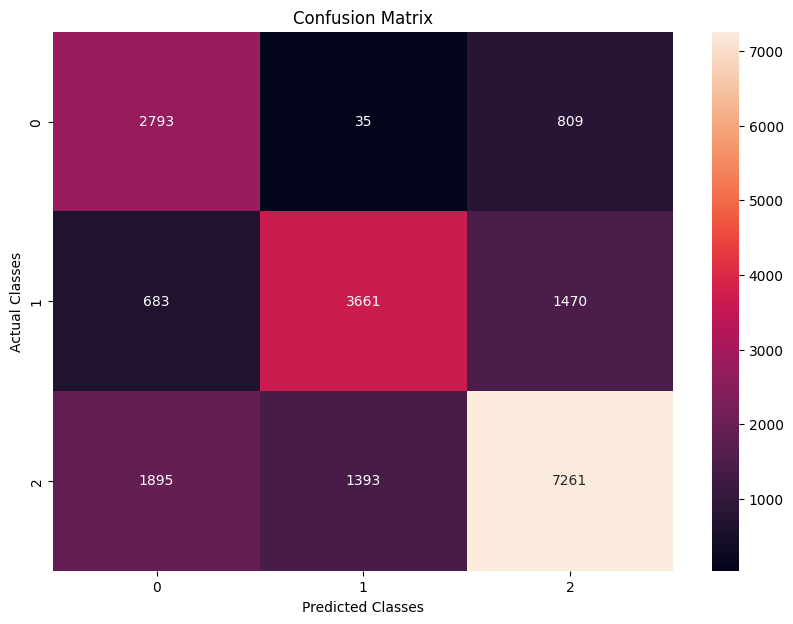

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained Sequential model and X_test, y_test are your test data and true labels.
# Predict the output
y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# If your y_test is one-hot encoded, convert it to class labels as well
y_test_class_labels = np.argmax(y_test_categorical, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_class_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')  # 'g' format to disable scientific notation
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()



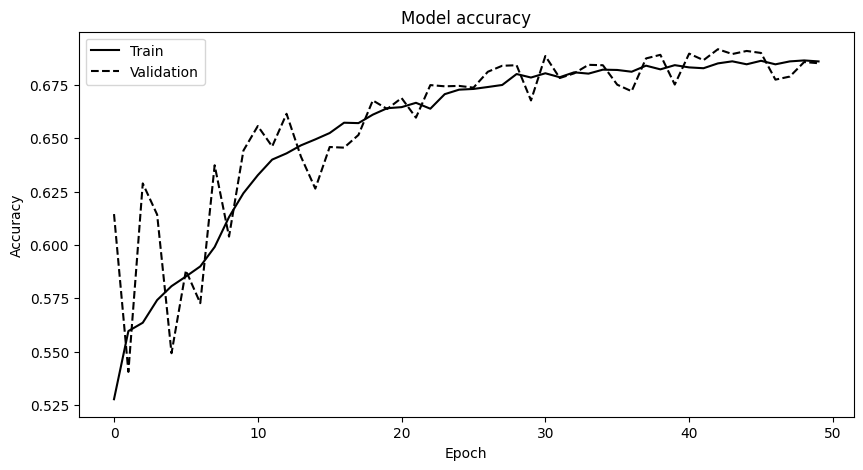

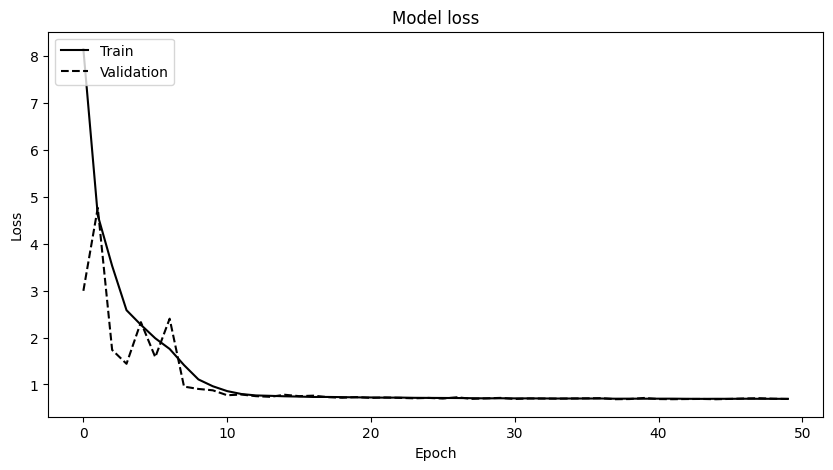

In [ ]:
import matplotlib.pyplot as plt



# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train', color='black')
plt.plot(history.history['val_accuracy'], label='Validation', linestyle='--', color='black')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_bw.png', dpi=300, format='png', bbox_inches='tight')  # Corrected file path
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train', color='black')
plt.plot(history.history['val_loss'], label='Validation', linestyle='--', color='black')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_bw.png', dpi=300, format='png', bbox_inches='tight')  # Corrected file path
plt.show()



In [ ]:
# Code to add horizontal lines to the existing accuracy graph for ensemble models
final_ensemble_accuracy = 81.575 / 100  # Convert percentage to proportion
ensemble_with_attention_accuracy = 77.35 / 100  # Convert percentage to proportion

# Add horizontal lines for ensemble model accuracies
plt.axhline(y=final_ensemble_accuracy, color='red', linestyle='-', label='Final Ensemble Model')
plt.axhline(y=ensemble_with_attention_accuracy, color='green', linestyle='-', label='Ensemble with Attention Model')

# Re-plot the original accuracy lines for context
plt.plot(history.history['accuracy'], label='Train', color='black')
plt.plot(history.history['val_accuracy'], label='Validation', linestyle='--', color='black')

# Add labels and legend
plt.title('Model Accuracy with Ensemble Comparisons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Show the updated plot with ensemble accuracies
plt.show()


In [ ]:
final_ensemble_accuracy = 81.575 / 100  # Convert percentage to proportion
ensemble_with_attention_accuracy = 77.35 / 100  # Convert percentage to proportion

# Add horizontal lines for ensemble model accuracies
plt.axhline(y=final_ensemble_accuracy, color='red', linestyle='-', label='Final Ensemble Model')
plt.axhline(y=ensemble_with_attention_accuracy, color='green', linestyle='-', label='Ensemble with Attention Model')

# Re-plot the original accuracy lines for context
plt.plot(history.history['accuracy'], label='Train', color='black')
plt.plot(history.history['val_accuracy'], label='Validation', linestyle='--', color='black')

# Add labels and legend
plt.title('Model Accuracy with Ensemble Comparisons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Move the legend to a different location (e.g., 'upper right')
plt.legend(loc='upper right')

# Show the updated plot with ensemble accuracies and adjusted legend position
plt.show()

In [ ]:
final_ensemble_accuracy = 81.575 / 100  # Convert percentage to proportion
ensemble_with_attention_accuracy = 77.35 / 100  # Convert percentage to proportion

# Add horizontal lines for ensemble model accuracies
plt.axhline(y=final_ensemble_accuracy, color='red', linestyle='-', label='Final Ensemble Model')
plt.axhline(y=ensemble_with_attention_accuracy, color='green', linestyle='-', label='Ensemble with Attention Model')

# Re-plot the original accuracy lines for context
plt.plot(history.history['accuracy'], label='Train', color='black')
plt.plot(history.history['val_accuracy'], label='Validation', linestyle='--', color='black')

# Add labels and legend
plt.title('Model Accuracy with Ensemble Comparisons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Move the legend outside of the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the updated plot with ensemble accuracies and legend outside the plot
plt.show()

***Initial Ensemble Model ***:

Create a voting ensemble of the two models. Since VotingClassifier works with sklearn-like classifiers we use our custom wrapper for the Keras model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train_encoded)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# wrapper
class KerasClassifierWrapper:
    def __init__(self, model):
        self.model = model
    def predict(self, X):
        predictions = self.model.predict(X)
        return predictions.argmax(axis=1)

In [ ]:
keras_model_wrapper = KerasClassifierWrapper(model)

In [ ]:
voting_ensemble = VotingClassifier(estimators=[
    ('rf', rf_model), ('keras', keras_model_wrapper)],
    voting='hard')

In [ ]:
rf_predictions = rf_model.predict(x_test)
keras_predictions = keras_model_wrapper.predict(x_test.to_numpy())

625/625 [==============================] - 1s 2ms/step


In [ ]:
combined_predictions = np.vstack((rf_predictions, keras_predictions))
final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), arr=combined_predictions, axis=0)

In [ ]:
ensemble_accuracy = accuracy_score(y_test_encoded, final_predictions)
print(f'Voting ensemble model accuracy: {ensemble_accuracy}')


Voting ensemble model accuracy: 0.7338


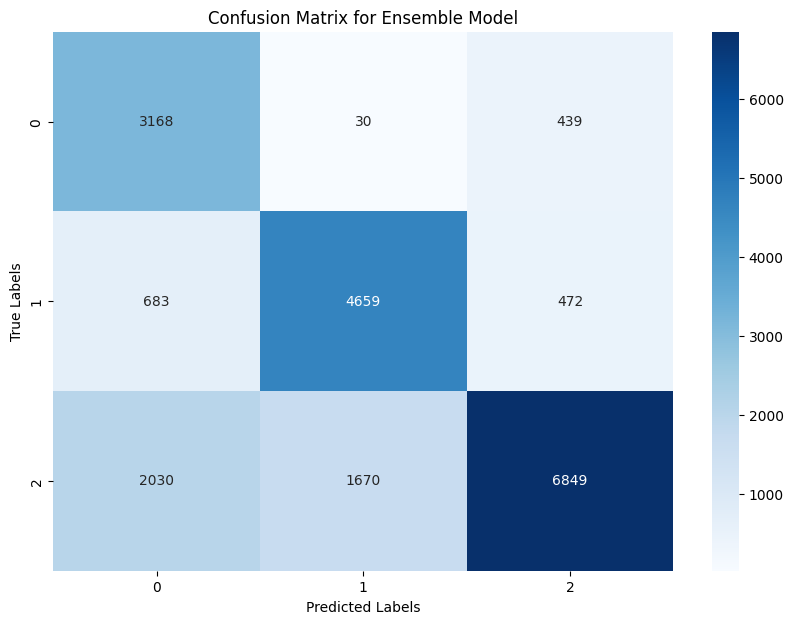

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix_ensemble = confusion_matrix(y_test_encoded, final_predictions)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues')  # 'd' means integer formatting
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


***Adding Attention Mechanism to the model***


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Multiply, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


In [ ]:
class FeatureAttention(tf.keras.layers.Layer):
    def __init__(self, input_dim):
        super(FeatureAttention, self).__init__()
        self.W = self.add_weight(shape=(input_dim,),
                                 initializer='uniform',
                                 trainable=True,
                                 name='attention_weights')

    def call(self, inputs):
        # Apply attention weights
        attention_scores = tf.multiply(inputs, self.W)
        return attention_scores

In [ ]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)



In [ ]:
input_layer = Input(shape=(x_train.shape[1],))
attention_output = FeatureAttention(input_dim=x_train.shape[1])(input_layer)
dense1 = Dense(64, activation='relu')(attention_output)
dense2 = Dense(32, activation='relu')(dense1)
output_layer = Dense(y_train_categorical.shape[1], activation='softmax')(dense2)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2000/2000 [==============================] - 7s 3ms/step - loss: 0.8686 - accuracy: 0.6337 - val_loss: 0.7216 - val_accuracy: 0.6703
Epoch 2/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.7091 - accuracy: 0.6795 - val_loss: 0.6931 - val_accuracy: 0.6929
Epoch 3/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6982 - accuracy: 0.6888 - val_loss: 0.6890 - val_accuracy: 0.6933
Epoch 4/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6928 - accuracy: 0.6921 - val_loss: 0.6846 - val_accuracy: 0.6896
Epoch 5/50
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6861 - accuracy: 0.6954 - val_loss: 0.6867 - val_accuracy: 0.6959
Epoch 6/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6829 - accuracy: 0.6950 - val_loss: 0.6837 - val_accuracy: 0.6978
Epoch 7/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6784 - accuracy: 0.6980 - val_loss: 0.6732 - val_accuracy:

In [ ]:
evaluation = model.evaluate(x_test, y_test_categorical)
print(f'Test loss: {evaluation[0]}, Test accuracy: {evaluation[1]}')

625/625 [==============================] - 1s 2ms/step - loss: 0.6477 - accuracy: 0.7145
Test loss: 0.6476564407348633, Test accuracy: 0.7145000100135803


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(x_train, y_train_encoded)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train_encoded)
nn_predictions_proba = model.predict(x_test)  # Neural Network predictions
rf_predictions_proba = rf_model.predict_proba(x_test)  # Random Forest predictions
gb_predictions_proba = gb_model.predict_proba(x_test)  # Gradient Boosting predictions
combined_predictions = np.concatenate((nn_predictions_proba, rf_predictions_proba, gb_predictions_proba), axis=1)
meta_learner = LogisticRegression()
meta_learner.fit(combined_predictions, y_test_encoded)

# Make final predictions
meta_features = np.concatenate((nn_predictions_proba, rf_predictions_proba, gb_predictions_proba), axis=1)
final_predictions = meta_learner.predict(meta_features)
ensemble_accuracy = accuracy_score(y_test_encoded, final_predictions)
print(f'Ensemble model accuracy with Stacking and three base models (including Gradient Boosting): {ensemble_accuracy}')

625/625 [==============================] - 1s 2ms/step
Ensemble model accuracy with Stacking and three base models (including Gradient Boosting): 0.81535


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


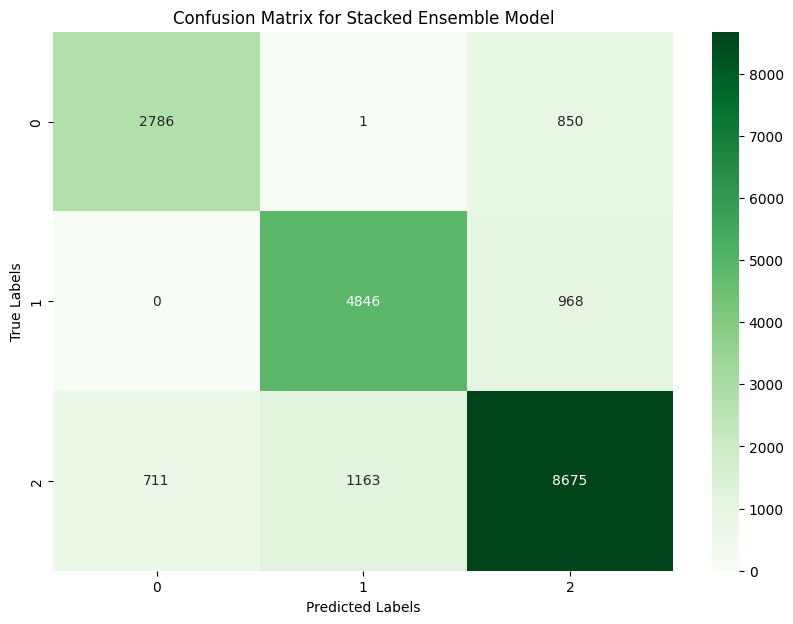

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


conf_matrix_stack_ensemble = confusion_matrix(y_test_encoded, final_predictions)

# Plot the confusion matrix using Seaborn's heatmap with a green color map
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_stack_ensemble, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Stacked Ensemble Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data and labels respectively
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(x_train, y_train)

# Get feature importances from the model
importances = rf.feature_importances_

# Get the feature names
feature_names = x_train.columns

# Combine the feature names and their importances into a DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importance ranking
print(feature_importances)


                                              Feature  Importance
32                                   outstanding_debt    0.098289
26                                      interest_rate    0.072432
34                                 credit_history_age    0.070082
30                               changed_credit_limit    0.056271
28                                delay_from_due_date    0.054840
37                                    monthly_balance    0.053823
33                           credit_utilization_ratio    0.050854
11                                    credit_mix_Good    0.047058
31                               num_credit_inquiries    0.042794
12                                credit_mix_Standard    0.041905
35                                total_emi_per_month    0.040756
23                              monthly_inhand_salary    0.040351
36                            amount_invested_monthly    0.039161
25                                    num_credit_card    0.038555
29        

In [ ]:
importances


Feature ranking:
1. feature outstanding_debt (0.09828856140815787)
2. feature interest_rate (0.07243243193137475)
3. feature credit_history_age (0.07008203395256557)
4. feature changed_credit_limit (0.056270776867390446)
5. feature delay_from_due_date (0.05483961012904573)
6. feature monthly_balance (0.05382319786514777)
7. feature credit_utilization_ratio (0.05085435797616494)
8. feature credit_mix_Good (0.04705823665750036)
9. feature num_credit_inquiries (0.04279364505937427)
10. feature credit_mix_Standard (0.0419051527922423)
11. feature total_emi_per_month (0.04075567614573312)
12. feature monthly_inhand_salary (0.040351329577939)
13. feature amount_invested_monthly (0.0391614333577082)
14. feature num_credit_card (0.038555420816171436)
15. feature num_of_delayed_payment (0.038208448913076204)
16. feature age (0.037244939614018535)
17. feature num_bank_accounts (0.024821701142371075)
18. feature num_of_loan (0.02224063707572267)
19. feature credit_mix_Bad (0.014822909689475427)
2

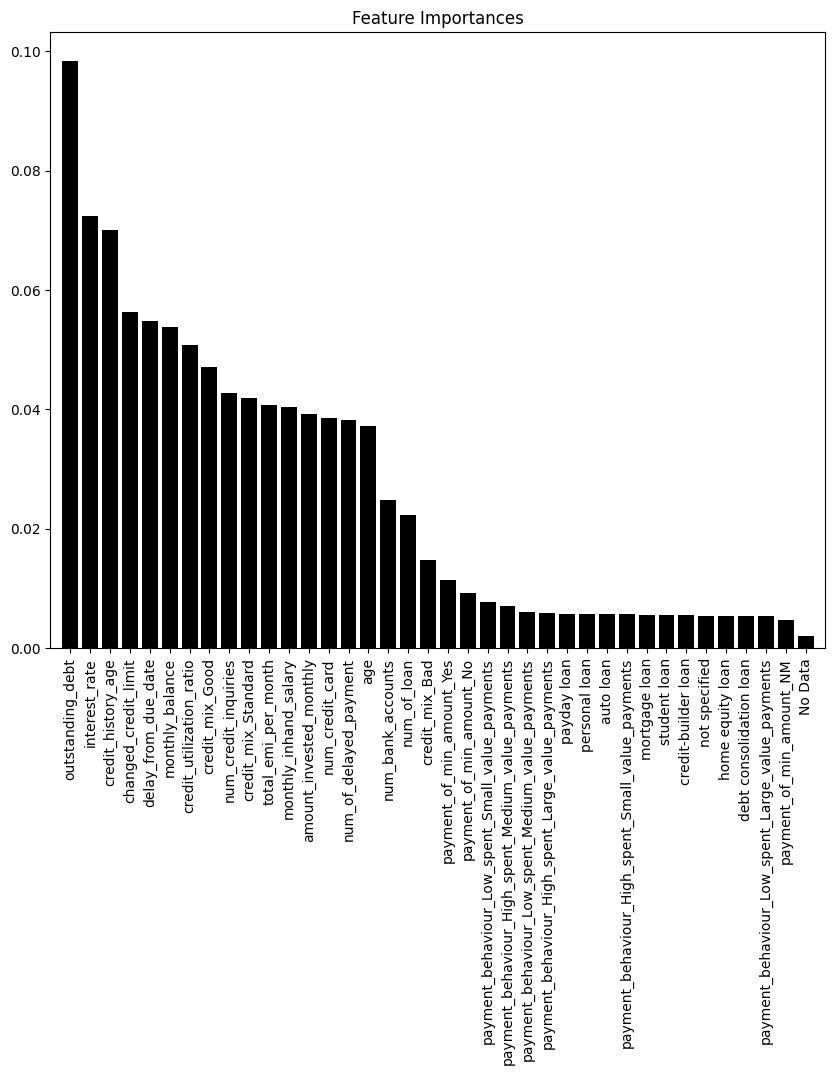

In [ ]:
import numpy as np

# Let's assume `feature_names` is a list of the feature names corresponding to the importance scores
feature_names = x_train.columns.tolist()

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Rearrange the names of the features to correspond to the sorted importances
sorted_feature_names = [feature_names[i] for i in indices]

# Rearrange the importances so that they are sorted from most to least important
sorted_importances = importances[indices]

# Print the feature rankings
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print(f"{f + 1}. feature {sorted_feature_names[f]} ({sorted_importances[f]})")

# Optionally, create a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), sorted_importances, color="black", align="center")
plt.xticks(range(x_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()
